## **Background**

The Customers have different characters based on several things, such as demography, culture, and behaviors. Understanding these differences could be a business advantage to create an appropriate strategy. Segmentation is one of method that is used to identify differences in customer characters and group them into groups with similar characteristics. In this time we will use RFM segmentation. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
pd.options.mode.chained_assignment = None

In [2]:
# Import dataset
pail= 'https://drive.google.com/file/d/1ELg9NNsaC44Q8r-Y7i8UKzUwZuNKFEom/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + pail.split('/')[-2]
datar= pd.read_csv(url)
datar.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN


## **Data Understanding**

In [3]:
# Dataframe info
datar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


In [4]:
datar.isnull().sum()

order_id             0
product_code         0
product_name      2718
quantity             0
order_date           0
price                0
customer_id     100920
dtype: int64

In [5]:
# Order_ID Check
cid= []
for i in datar['order_id']:
    r= re.findall(r'\D',i)
    if r!=[] and r not in cid:
        cid.append(r)
print(cid)

[['C'], ['A']]


In [6]:
# What is 'C' in order_id
datar[datar['order_id'].str.contains('C')].head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
12,C493415,21527,RETRO SPOT TRADITIONAL TEAPOT,-3,2010-01-04 10:33:00,7.95,14590.0
13,C493426,22109,FULL ENGLISH BREAKFAST PLATE,-1,2010-01-04 10:41:00,3.39,16550.0
56,C493430,21556,CERAMIC STRAWBERRY MONEY BOX,-1,2010-01-04 11:43:00,2.55,14680.0
57,C493430,21232,STRAWBERRY CERAMIC TRINKET BOX,-2,2010-01-04 11:43:00,1.25,14680.0


In [39]:
# Product_code check
cod= []
for i in datar['product_code']:
    r=re.findall(r'\D',i)
    if r!=[] and i not in cod:
        cod.append(i)
print(cod)

['TEST001', '35001G', '18096C', '72369A', '84563A', '84562A', '85123A', '84029E', '47591D', '85132B', '84032A', '84997A', '84997B', '84997C', '84997D', '15060B', '85099C', '85099B', '84520D', '84596F', '84596B', '84596E', '84559A', '84031B', '72800D', '72038P', '84031A', '16207A', '40046A', '84288B', '85231B', '85231L', '85049B', '84558A', '35004P', '35004G', '46776A', '46776B', '46776E', '46776C', '46776F', '72800C', '72799F', '72799C', '72799E', '72800F', '72800A', '72800B', '72799A', '85132A', '71028B', '85167B', '85166B', '85167A', '85183A', '85183B', '47347B', '84596K', '84596J', '84535A', '79190B', '79190A', '79190D', '85099F', '82001S', '84671B', '84741C', '85049F', '84029C', '84509F', '85232B', '46000M', '47566B', '79323W', '85129C', '85129D', '84845C', '84845D', '82494L', '17164D', '84292B', '85199L', '85185B', '85185F', '47578A', '84659A', '35096A', '35096B', '84970L', '85185C', '84510A', '40046C', '84753A', '84029D', '84671A', '90004A', '90121B', '35980C', '62097A', '84877C'

In [8]:
# Product ends with letter
datar[datar['product_code']=='84029D'].head()   # I thought it was sellable product too

,order_id,product_code,product_name,quantity,order_date,price,customer_id
490,493517,84029D,NaN,2,2010-01-04 15:11:00,0.00,NaN
12012,494640,84029D,LEOPARD PRINT HOT WATER BOTTLE,3,2010-01-17 11:31:00,3.75,17801.0
12343,494652,84029D,LEOPARD PRINT HOT WATER BOTTLE,24,2010-01-17 12:40:00,2.95,14527.0
12794,494669,84029D,LEOPARD PRINT HOT WATER BOTTLE,1,2010-01-17 15:02:00,3.75,15916.0
13069,494683,84029D,LEOPARD PRINT HOT WATER BOTTLE,2,2010-01-18 11:21:00,3.75,15747.0


In [9]:
# how the others
datar[datar['product_code']=='gift_0001_10']    # it wasn't sellable product

,order_id,product_code,product_name,quantity,order_date,price,customer_id
74728,501441,gift_0001_10,Dotcomgiftshop Gift Voucher ��10.00,1,2010-03-16 13:44:00,8.51,NaN
84658,502486,gift_0001_10,Dotcomgiftshop Gift Voucher ��10.00,1,2010-03-24 17:43:00,8.51,NaN
160640,510637,gift_0001_10,Dotcomgiftshop Gift Voucher ��10.00,1,2010-06-02 11:54:00,8.51,NaN
234709,518496,gift_0001_10,NaN,10,2010-08-09 12:31:00,0.00,NaN
283679,523696,gift_0001_10,Dotcomgiftshop Gift Voucher ��10.00,1,2010-09-23 14:47:00,8.51,NaN
365228,531489,gift_0001_10,Dotcomgiftshop Gift Voucher ��10.00,1,2010-11-08 15:02:00,8.51,NaN


In [10]:
# Product code=product name check
bm= datar.groupby('product_code').agg(number=('product_name','nunique'))
bm[bm['number']>1]

,number
product_code,
10120,2
15056N,2
15058A,2
15058B,2
16012,2
...,...
85232b,2
90208,2
ADJUST,3


In [11]:
datar[datar['product_code']=='85099b']

,order_id,product_code,product_name,quantity,order_date,price,customer_id
163588,511006,85099b,JUMBO BAG RED RETROSPOT,2,2010-06-04 14:55:00,4.21,NaN
163640,511010,85099b,JUMBO BAG RED RETROSPOT,1,2010-06-04 14:59:00,4.21,NaN
163651,511011,85099b,JUMBO BAG RED RETROSPOT,2,2010-06-04 14:59:00,4.21,NaN
163672,511012,85099b,JUMBO BAG RED RETROSPOT,1,2010-06-04 15:00:00,4.21,NaN
170098,511506,85099b,JUMBO BAG RED RETROSPOT,4,2010-06-08 15:24:00,4.21,NaN
188399,513401,85099b,JUMBO BAG RED RETROSPOT,4,2010-06-24 11:50:00,5.06,NaN
188422,513400,85099b,JUMBO BAG RED RETROSPOT,5,2010-06-24 11:50:00,5.06,NaN
188458,513403,85099b,JUMBO BAG RED RETROSPOT,2,2010-06-24 11:51:00,5.06,NaN
202194,514913,85099b,JUMBO BAG RED RETROSPOT,1,2010-07-07 11:17:00,5.06,NaN
202224,514912,85099b,JUMBO BAG RED RETROSPOT,1,2010-07-07 11:17:00,5.06,NaN


In [12]:
# Quantity Check
datar[datar['quantity']<0].head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
12,C493415,21527,RETRO SPOT TRADITIONAL TEAPOT,-3,2010-01-04 10:33:00,7.95,14590.0
13,C493426,22109,FULL ENGLISH BREAKFAST PLATE,-1,2010-01-04 10:41:00,3.39,16550.0
56,C493430,21556,CERAMIC STRAWBERRY MONEY BOX,-1,2010-01-04 11:43:00,2.55,14680.0
57,C493430,21232,STRAWBERRY CERAMIC TRINKET BOX,-2,2010-01-04 11:43:00,1.25,14680.0


In [13]:
# Price Check
datar[datar['price']<0] 

,order_id,product_code,product_name,quantity,order_date,price,customer_id
124462,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN
213524,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN
329774,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN


From analitics above, we know:
1. There are missing values from product_name and customer_id columns.
2. There are any inappropriate datatypes.
3. There are unique letter in order_id columns. The letter 'C' indicated a cancelled order and 'A' indicated something adjusted by a cashier and not a part of the customer ordered.
4. Product_code ends with letter clasified as a sellable product. Meanwhile Product_code starting with letter or just a letter clasified as non-sellable product.
5. Negatice qty is the canceled order from customer.
6. Negative price is the adjusment of bad dept.
7. There are any product code has multiple product name (but necessary in this project because we just need concern about customer behavior).

## **Data Cleansing**

In [14]:
# Missing value handling
dat=datar.copy()
datac= dat.dropna(axis=0)
datac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360853 entries, 0 to 461744
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      360853 non-null  object 
 1   product_code  360853 non-null  object 
 2   product_name  360853 non-null  object 
 3   quantity      360853 non-null  int64  
 4   order_date    360853 non-null  object 
 5   price         360853 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 22.0+ MB


In [15]:
# set a string value into lower letter
datac.loc[:,'product_code']= datac['product_code'].str.lower()
datac.loc[:,'product_name']= datac['product_name'].str.lower()
datac.loc[:,'order_id']= datac['order_id'].str.lower()
datac.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,test001,this is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,c493411,21539,retro spots butter dish,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,test001,this is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
6,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0
7,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0


In [16]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360853 entries, 0 to 461744
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      360853 non-null  object 
 1   product_code  360853 non-null  object 
 2   product_name  360853 non-null  object 
 3   quantity      360853 non-null  int64  
 4   order_date    360853 non-null  object 
 5   price         360853 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 22.0+ MB


In [17]:
# Change datatype of order_date
datac['order_date']= pd.to_datetime(datac['order_date'])
# Change datatype od customer_id
datac['customer_id']= datac['customer_id'].astype(str)
datac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360853 entries, 0 to 461744
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      360853 non-null  object        
 1   product_code  360853 non-null  object        
 2   product_name  360853 non-null  object        
 3   quantity      360853 non-null  int64         
 4   order_date    360853 non-null  datetime64[ns]
 5   price         360853 non-null  float64       
 6   customer_id   360853 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 22.0+ MB


In [18]:
datac.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,test001,this is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,c493411,21539,retro spots butter dish,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,test001,this is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
6,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0
7,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0


In [19]:
# Check unique characters remaining
cid= []
for i in datac['order_id']:
    r= re.findall(r'\D',i)
    if r!=[] and r not in cid:
        cid.append(r)

cod= []
for i in datac['product_code']:
    r=re.findall(r'^([A-Za-z])[A-Za-z]*\d*\D*+$',i)
    if r!=[] and i not in cod:
        cod.append(i)

print(f'Order_id unique: {cid}')
print(f'Product_id unique: {cod}')

Order_id unique: [['c']]
Product_id unique: ['test001', 'post', 'm', 'd', 'pads', 'adjust', 'c2', 'bank charges', 'adjust2', 'sp1002']


In [20]:
# Drop unique character 
sep='|'
pilter= sep.join(cod)

datac= datac[~(datac['order_id'].str.contains('c',case=False)|
             datac['product_code'].str.contains(pilter))]
datac.head()


,order_id,product_code,product_name,quantity,order_date,price,customer_id
6,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0
7,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0
8,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0
9,493414,35001g,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0
10,493414,21527,retro spot traditional teapot,12,2010-01-04 10:28:00,6.95,14590.0


In [21]:
# Check againn
cid= []
for i in datac['order_id']:
    r= re.findall(r'\D',i)
    if r!=[] and r not in cid:
        cid.append(r)

cod= []
for i in datac['product_code']:
    r=re.findall(r'^([A-Za-z])[A-Za-z]*\d*\D*+$',i)
    if r!=[] and i not in cod:
        cod.append(i)

print(f'Order_id unique: {cid}')
print(f'Product_id unique: {cod}')

Order_id unique: []
Product_id unique: []


In [22]:
# Outlier check
zscore= stats.zscore(datac[['quantity','price']])
print(zscore.max())
print(zscore.min())

149.20937173330466
-0.6684387424969479


In [23]:
# Check what is outlier values
datac[(zscore>100).any(axis=1)]

,order_id,product_code,product_name,quantity,order_date,price,customer_id
83302,502269,21984,pack of 12 pink paisley tissues,10000,2010-03-23 15:36:00,0.25,17940.0
83303,502269,21982,pack of 12 suki tissues,10000,2010-03-23 15:36:00,0.25,17940.0
83304,502269,21980,pack of 12 red spotty tissues,10000,2010-03-23 15:36:00,0.25,17940.0
83305,502269,21981,pack of 12 woodland tissues,10000,2010-03-23 15:36:00,0.25,17940.0
260032,521315,17003,brocade ring purse,7128,2010-09-03 12:01:00,0.19,15838.0
288863,524174,21096,set/6 fruit salad paper plates,7008,2010-09-27 16:30:00,0.13,13687.0
288864,524174,21088,set/6 fruit salad paper cups,7128,2010-09-27 16:30:00,0.08,13687.0
355872,530715,84347,rotating silver angels t-light hldr,9360,2010-11-04 11:36:00,1.69,15838.0


The outlier values are from massive qty ordered by cust. I decided to keep this value, however it has very a big zscore instead of deleting all of them. Therfore, I transform the outlier into upper/lower border values.

In [24]:
# Outlier handling
colum= datac[['quantity','price']].columns

def outlier(data,colum):
    col=colum
    for p, col in enumerate(col):
        for i in [col]:
            Q3, Q1= np.quantile(data.loc[:,i], [0.75,0.25])
            IQR= Q3-Q1
            data.loc[data[i]<Q1-1.5*IQR,col]=Q1.astype(int)
            data.loc[data[i]>Q3+1.5*IQR,col]=Q3.astype(int)
outlier(datac,colum)
datac.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
6,493414,21844,retro spot mug,12,2010-01-04 10:28:00,2.55,14590.0
7,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0
8,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0
9,493414,35001g,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0
10,493414,21527,retro spot traditional teapot,12,2010-01-04 10:28:00,6.95,14590.0


In [25]:
# Check what is outlier values againnnn

zscore= stats.zscore(datac[['quantity','price']])
print(zscore.max())
print(zscore.min())

3.2451857698160236
-1.4663971284902382


In [26]:
datac[(zscore>3).any(axis=1)]

,order_id,product_code,product_name,quantity,order_date,price,customer_id
2899,493923,21108,fairy cake flannel assorted colour,27,2010-01-08 11:16:00,2.55,13360.0
3183,493965,90203,silver charm necklace 70cm,1,2010-01-08 16:34:00,7.50,14573.0
3741,493995,21779,ma campagne mini wooden chest,19,2010-01-10 13:50:00,7.36,13694.0
5644,494021,21080,set/20 red spotty paper napkins,27,2010-01-11 09:53:00,0.85,15738.0
7388,494243,21553,ceramic birdhouse finch blue large,27,2010-01-12 15:57:00,4.00,18102.0
...,...,...,...,...,...,...,...
426075,536796,85144,jardin etched glass butter dish,1,2010-12-02 15:46:00,7.25,15574.0
430783,537210,85231b,cinammon set of 9 t-lights,27,2010-12-05 15:15:00,0.85,15953.0
438666,537780,84997b,red 3 piece retrospot cutlery set,26,2010-12-08 12:45:00,3.75,17324.0
448724,538638,90078,pink/white glass demi choker,2,2010-12-13 14:16:00,7.50,17231.0


I thought we have made better in zscore with the max zscoer value around 3. is it better?

In [27]:
datac.describe()

,quantity,order_date,price
count,348680.000000,348680,348680.000000
mean,6.804001,2010-07-22 18:05:28.569002752,2.334243
min,1.000000,2010-01-04 10:28:00,0.000000
25%,2.000000,2010-04-25 13:20:00,1.250000
50%,4.000000,2010-08-03 14:23:00,1.950000
75%,12.000000,2010-10-25 11:33:00,3.000000
max,27.000000,2010-12-23 16:06:00,7.500000
std,6.357614,NaN,1.591824


## **Analysis**

### Dataset Analysis

In [28]:
# Add necessary columns
datac['amount']= (datac['price']*datac['quantity']).astype(int)
datac.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,amount
6,493414,21844,retro spot mug,12,2010-01-04 10:28:00,2.55,14590.0,30
7,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,51
8,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0,5
9,493414,35001g,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0,8
10,493414,21527,retro spot traditional teapot,12,2010-01-04 10:28:00,6.95,14590.0,83


In [29]:
# Agregate Necessary variabel (order count, value order, and last time order)

cust= datac.groupby('customer_id').agg(order_count=('order_id','nunique'),total_amount=('amount','sum'),
                                       last_order=('order_date','max')).reset_index()
cust

,customer_id,order_count,total_amount,last_order
0,12346.0,2,156,2010-06-28 13:53:00
1,12608.0,1,193,2010-10-31 10:49:00
2,12745.0,2,464,2010-08-10 10:14:00
3,12746.0,1,235,2010-06-17 10:41:00
4,12747.0,14,3359,2010-12-13 10:41:00
...,...,...,...,...
3862,18283.0,6,433,2010-11-22 15:30:00
3863,18284.0,1,316,2010-10-04 11:33:00
3864,18285.0,1,143,2010-02-17 10:24:00
3865,18286.0,1,739,2010-08-20 11:57:00


In [30]:
# Search days different between last order and today (we assumed 'today' is the max last order from all of them)

tod= cust['last_order'].max()
cust['last_order_distance']= (tod-cust['last_order']).dt.days
cust


,customer_id,order_count,total_amount,last_order,last_order_distance
0,12346.0,2,156,2010-06-28 13:53:00,178
1,12608.0,1,193,2010-10-31 10:49:00,53
2,12745.0,2,464,2010-08-10 10:14:00,135
3,12746.0,1,235,2010-06-17 10:41:00,189
4,12747.0,14,3359,2010-12-13 10:41:00,10
...,...,...,...,...,...
3862,18283.0,6,433,2010-11-22 15:30:00,31
3863,18284.0,1,316,2010-10-04 11:33:00,80
3864,18285.0,1,143,2010-02-17 10:24:00,309
3865,18286.0,1,739,2010-08-20 11:57:00,125


### Scoring

In [31]:
# Recency Score

cust['recency']= pd.cut(cust['last_order_distance'],
                        bins=[cust['last_order_distance'].min(),
                              np.percentile(cust['last_order_distance'], 20),
                              np.percentile(cust['last_order_distance'], 40),
                              np.percentile(cust['last_order_distance'], 60),
                              np.percentile(cust['last_order_distance'], 80),
                              cust['last_order_distance'].max()],
                        labels=[5,4,3,2,1],
                        include_lowest=True).astype(int)
cust.head()

,customer_id,order_count,total_amount,last_order,last_order_distance,recency
0,12346.0,2,156,2010-06-28 13:53:00,178,1
1,12608.0,1,193,2010-10-31 10:49:00,53,3
2,12745.0,2,464,2010-08-10 10:14:00,135,2
3,12746.0,1,235,2010-06-17 10:41:00,189,1
4,12747.0,14,3359,2010-12-13 10:41:00,10,5


In [32]:
# Frequency Score

cust['frquency']= pd.cut(cust['order_count'],
                         bins=[0,
                               np.percentile(cust['order_count'],20),
                               np.percentile(cust['order_count'],40),
                               np.percentile(cust['order_count'],60),
                               np.percentile(cust['order_count'],80),
                               cust['order_count'].max()],
                        labels=[1,2,3,4,5],
                        include_lowest=True).astype(int)
cust.head()

,customer_id,order_count,total_amount,last_order,last_order_distance,recency,frquency
0,12346.0,2,156,2010-06-28 13:53:00,178,1,2
1,12608.0,1,193,2010-10-31 10:49:00,53,3,1
2,12745.0,2,464,2010-08-10 10:14:00,135,2,2
3,12746.0,1,235,2010-06-17 10:41:00,189,1,1
4,12747.0,14,3359,2010-12-13 10:41:00,10,5,5


In [33]:
# Monetary Score

cust['monetary']= pd.cut(cust['total_amount'],
                         bins=[cust['total_amount'].min(),
                               np.percentile(cust['total_amount'],20),
                               np.percentile(cust['total_amount'],40),
                               np.percentile(cust['total_amount'],60),
                               np.percentile(cust['total_amount'],80),
                               cust['total_amount'].max()],
                        labels=[1,2,3,4,5],
                        include_lowest=True).astype(int)
cust.head()

,customer_id,order_count,total_amount,last_order,last_order_distance,recency,frquency,monetary
0,12346.0,2,156,2010-06-28 13:53:00,178,1,2,1
1,12608.0,1,193,2010-10-31 10:49:00,53,3,1,2
2,12745.0,2,464,2010-08-10 10:14:00,135,2,2,3
3,12746.0,1,235,2010-06-17 10:41:00,189,1,1,2
4,12747.0,14,3359,2010-12-13 10:41:00,10,5,5,5


In [34]:
# Calculate Overall RFM Score

cust['segment']= np.select([(cust['recency']==5)&(cust['frquency']>=4),
                            (cust['recency'].between(3,4))&(cust['frquency']>=4),
                            (cust['recency']>=4)&(cust['frquency'].between(2,3)),
                            (cust['recency']<=2)&(cust['frquency']==5),
                            (cust['recency']==3)&(cust['frquency']==3),
                            (cust['recency']==5)&(cust['frquency']==1),
                            (cust['recency']==4)&(cust['frquency']>=1),
                            (cust['recency']<=2)&(cust['frquency'].between(3,4)),
                            (cust['recency']==3)&(cust['frquency']<=2),
                            (cust['recency']<=2)&(cust['frquency']<=2)],
                            ['01. Champion','02. Loyal customers','03. Potential loyalist',"04. Can't lose them",
                            '05. Need Attention','06. Need Customers','07. Promising','08. At Risk',
                            '09. About to sleep','10. Hibernating'],
                            default='Other')    #Need to set default according eror in numpy version>=2.0
cust.head()

,customer_id,order_count,total_amount,last_order,last_order_distance,recency,frquency,monetary,segment
0,12346.0,2,156,2010-06-28 13:53:00,178,1,2,1,10. Hibernating
1,12608.0,1,193,2010-10-31 10:49:00,53,3,1,2,09. About to sleep
2,12745.0,2,464,2010-08-10 10:14:00,135,2,2,3,10. Hibernating
3,12746.0,1,235,2010-06-17 10:41:00,189,1,1,2,10. Hibernating
4,12747.0,14,3359,2010-12-13 10:41:00,10,5,5,5,01. Champion


**NOTE**
 
 The Schema of scoring depends on the business context. There are no strict rules to determine scoring schema for RFM segmentation. 

## **Result**

In [35]:
# Create Summary

sumardi= pd.pivot_table(cust, index='segment', values=['customer_id','order_count','total_amount','last_order_distance'],
                        aggfunc={'customer_id':pd.Series.nunique,
                                 'order_count':['median','mean'],
                                 'total_amount':['median','mean'],
                                 'last_order_distance':['median','mean']})
sumardi['percentage']= (sumardi['customer_id']/sumardi['customer_id'].sum()*100).round(1)
sumardi

customer_id last_order_distance        order_count  \
                           nunique                mean median        mean   
segment                                                                     
01. Champion                   580           11.674138   11.0   12.506897   
02. Loyal customers            598           42.376254   38.0    6.759197   
03. Potential loyalist         401           23.815461   25.0    2.433915   
04. Can't lose them             47          124.702128  113.0    9.595745   
05. Need Attention             116           60.129310   61.0    3.000000   
06. Need Customers              66           14.954545   17.0    1.000000   
07. Promising                  159           32.981132   34.0    1.000000   
08. At Risk                    331          136.577039  118.0    3.797583   
09. About to sleep             424           59.283019   59.0    1.426887   
10. Hibernating               1145          193.330131  193.0    1.284716   

                              total_amount         percentage  
                       median         mean  median             
segment                                                        
01. Champion              8.0  3075.034483  1908.5       15.0  
02. Loyal customers       6.0  1768.260870  1348.0       15.5  
03. Potential loyalist    2.0   559.029925   465.0       10.4  
04. Can't lose them       8.0  2150.212766  1610.0        1.2  
05. Need Attention        3.0   774.241379   635.5        3.0  
06. Need Customers        1.0   196.939394   157.0        1.7  
07. Promising             1.0   235.754717   196.0        4.1  
08. At Risk               3.0   894.344411   701.0        8.6  
09. About to sleep        1.0   381.132075   275.0       11.0  
10. Hibernating           1.0   282.287336   202.0       29.6

In [36]:
# Label for Chart

indek= sumardi['percentage'].sort_values(ascending=False).reset_index()
lab=[]
for i in indek['segment']:
    lab.append(i[4:])
pct=[]
for i in indek['percentage']:
    pct.append(i)

l=0
ll=[]
while l<=9:
    ll.append(f'{lab[l]} \n {pct[l]}%')
    l+=1
ll

['Hibernating \n 29.6%',
 'Loyal customers \n 15.5%',
 'Champion \n 15.0%',
 'About to sleep \n 11.0%',
 'Potential loyalist \n 10.4%',
 'At Risk \n 8.6%',
 'Promising \n 4.1%',
 'Need Attention \n 3.0%',
 'Need Customers \n 1.7%',
 "Can't lose them \n 1.2%"]

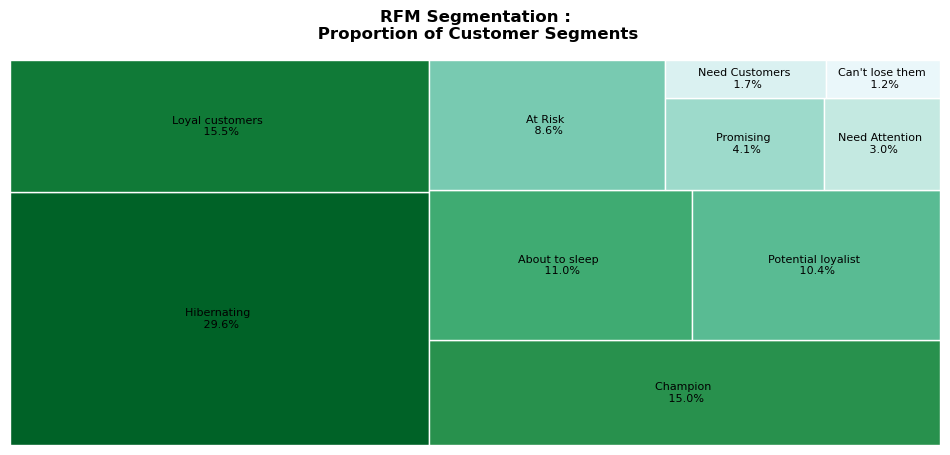

In [37]:
# Visualize the result

import squarify

colors=sns.color_palette('BuGn_r',len(sumardi['percentage']))
plt.figure(figsize=(12,5))
squarify.plot(sizes=sumardi['percentage'].sort_values(ascending=False),
              label=ll,
              color=colors,
              ec='white',
              text_kwargs={
                  'fontsize':8
              }
              )

plt.title('RFM Segmentation :\n Proportion of Customer Segments', pad=15, fontweight='bold')
plt.axis('off')
plt.show()

Result:
1. Most customers are classified as 'Hibernating' segment with **29.6%**% of total customers. On the other hand, 'Can't lose them' is the lowest segment with **1.2**% of total customers.
2. The 'HIbernating' segment spends 282.287336 on average for buying a product, meanwhile 'Can't lose them' segment spends more than them with 2150.212766 on average.
3. The 'Champion' segment is only in third with **15.0%** of total customer. This segment has spent 3075.034483 on average.